In [36]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import griddata
from matplotlib import style
style.use('fivethirtyeight')

In [56]:
path_data = "./data/PIN_MLE_new_20.txt"
df = pd.read_csv(path_data)

# Tables

In [57]:
df.describe()

,alpha,delta,epsilon_b,epsilon_s,mu,buy,sell,MLE
count,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07,2.014086e+07
mean,4.950694e-01,4.949451e-01,1.995042e+02,1.995101e+02,1.995081e+02,2.484163e+02,2.493699e+02,-9.019616e+00
std,2.857641e-01,2.857881e-01,5.772931e+01,5.773260e+01,5.773947e+01,1.084904e+02,1.089776e+02,1.266087e+00
min,2.815410e-08,8.866421e-08,1.000000e+02,1.000000e+02,1.000000e+02,5.800000e+01,5.800000e+01,-2.517582e+01
25%,2.476879e-01,2.474901e-01,1.500000e+02,1.500000e+02,1.490000e+02,1.650000e+02,1.660000e+02,-9.668523e+00
50%,4.951557e-01,4.948837e-01,1.990000e+02,2.000000e+02,2.000000e+02,2.300000e+02,2.310000e+02,-8.784830e+00
75%,7.425641e-01,7.424389e-01,2.490000e+02,2.500000e+02,2.500000e+02,2.950000e+02,2.960000e+02,-8.111811e+00
max,9.900000e-01,9.900000e-01,2.990000e+02,2.990000e+02,2.990000e+02,6.820000e+02,6.940000e+02,-6.462882e+00


In [39]:
df.corr()

,alpha,delta,epsilon_b,epsilon_s,mu,buy,sell,MLE
alpha,1.000000,-0.000166,0.000031,0.000085,0.000304,0.260178,0.264238,-0.201539
delta,-0.000166,1.000000,-0.000193,0.000038,0.000338,0.260336,-0.258924,-0.003184
epsilon_b,0.000031,-0.000193,1.000000,0.000106,0.000303,0.000066,0.529696,-0.105517
epsilon_s,0.000085,0.000038,0.000106,1.000000,0.000218,0.532316,0.000198,-0.105668
mu,0.000304,0.000338,0.000303,0.000218,1.000000,0.131040,0.132659,-0.030009
buy,0.260178,0.260336,0.000066,0.532316,0.131040,1.000000,-0.206188,-0.226907
sell,0.264238,-0.258924,0.529696,0.000198,0.132659,-0.206188,1.000000,-0.225040
MLE,-0.201539,-0.003184,-0.105517,-0.105668,-0.030009,-0.226907,-0.225040,1.000000


In [40]:
df_1000 = df.head(1000)

## Computation of errors

In [41]:
df['e_alpha'] = (df['alpha']-df['alpha'])/(np.max(df['alpha']) - np.min(df['alpha']))

# Graphs

<AxesSubplot:>

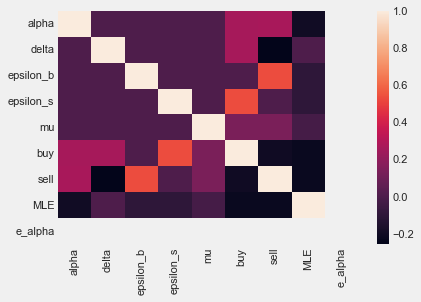

In [52]:
sns.heatmap(df.corr())

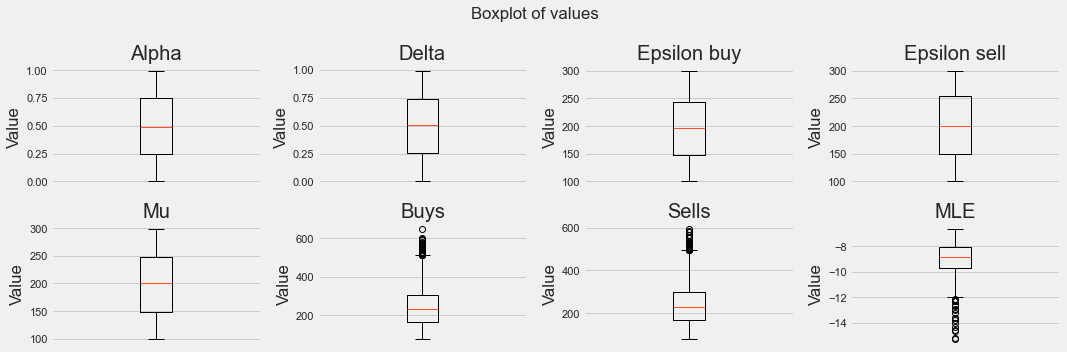

In [49]:

fig, axs = plt.subplots(2, 4,figsize=(15,5))
fig.suptitle('Boxplot of values')
axs[0, 0].boxplot(df_1000["alpha"])
axs[0, 0].set_title("Alpha")
axs[0, 1].boxplot(df_1000["delta"])
axs[0, 1].set_title("Delta")
axs[0, 2].boxplot(df_1000["epsilon_b"])
axs[0, 2].set_title("Epsilon buy")
axs[0, 3].boxplot(df_1000["epsilon_s"])
axs[0, 3].set_title("Epsilon sell")
axs[1, 0].boxplot(df_1000["mu"])
axs[1, 0].set_title("Mu")
axs[1, 1].boxplot(df_1000["buy"])
axs[1, 1].set_title("Buys")
axs[1, 2].boxplot(df_1000["sell"])
axs[1, 2].set_title("Sells")
axs[1, 3].boxplot(df_1000["MLE"])
axs[1, 3].set_title("MLE")

for ax in axs.flat:
    ax.set(ylabel='Value')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    #ax.label_outer()
    ax.set_xticks([])
    
plt.tight_layout()

In [158]:
df_ei = pd.read_csv("./results/table/ei_results.csv")

df_ei.describe().to_latex("./results/table/stat_desc_ei.tex")
df_ei.describe()


/var/folders/hv/kjs_mg3s28b_rhljhxq6r2f80000gp/T/ipykernel_58914/1210735849.py:3: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  df_ei.describe().to_latex("./results/table/stat_desc_ei.tex")


,alpha,delta,epsilon_b,epsilon_s,mu
count,1.000000e+01,10.000000,1.000000e+01,1.000000e+01,1.000000e+01
mean,4.658009e+00,0.718834,3.132971e-03,1.084630e-02,1.142499e-03
std,1.460826e+01,2.233867,9.655435e-03,3.427288e-02,3.568540e-03
min,5.607187e-17,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.746804e-04,0.000196,1.518006e-07,1.799651e-07,2.550929e-08
50%,4.243958e-03,0.000513,1.074958e-06,8.794017e-07,2.670671e-07
75%,1.076231e-02,0.007973,5.554013e-06,2.306076e-06,3.836988e-06
max,4.623290e+01,7.075938,3.060547e-02,1.083886e-01,1.129818e-02


In [159]:
# à voir s'il il faut le faire
df_ei_test = df_ei[df_ei <= df_ei.quantile(0.75)]

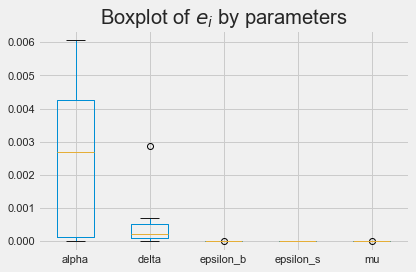

In [160]:
df_ei_test.boxplot()
plt.title(r"Boxplot of $e_i$ by parameters")
plt.tight_layout()
plt.savefig("./results/graphs/boxplot_ei.png")

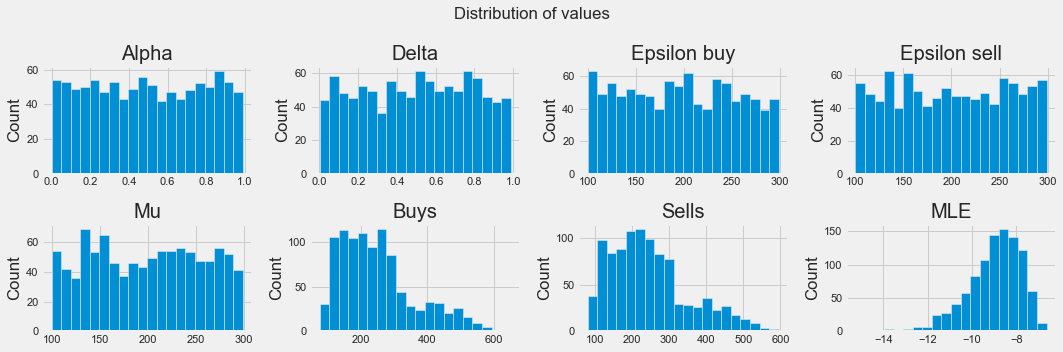

In [113]:
fig, axs = plt.subplots(2, 4,figsize=(15,5))
fig.suptitle('Distribution of values')
axs[0, 0].hist(df_1000["alpha"],20)
axs[0, 0].set_title("Alpha")
axs[0, 1].hist(df_1000["delta"],20)
axs[0, 1].set_title("Delta")
axs[0, 2].hist(df_1000["epsilon_b"],20)
axs[0, 2].set_title("Epsilon buy")
axs[0, 3].hist(df_1000["epsilon_s"],20)
axs[0, 3].set_title("Epsilon sell")
axs[1, 0].hist(df_1000["mu"],20)
axs[1, 0].set_title("Mu")
axs[1, 1].hist(df_1000["buy"],20)
axs[1, 1].set_title("Buys")
axs[1, 2].hist(df_1000["sell"],20)
axs[1, 2].set_title("Sells")
axs[1, 3].hist(df_1000["MLE"],20)
axs[1, 3].set_title("MLE")

for ax in axs.flat:
    ax.set(ylabel='Count')
plt.tight_layout()

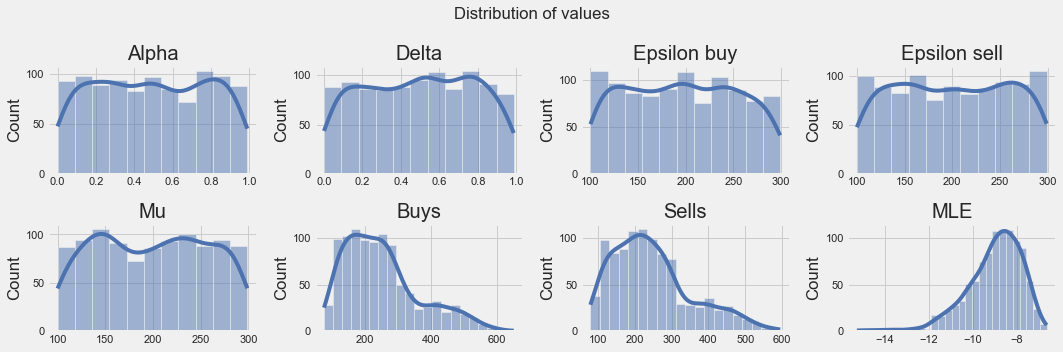

In [91]:
fig, axs = plt.subplots(2, 4,figsize=(15,5))
fig.suptitle('Distribution of values')

sns.histplot(df_1000["alpha"],kde=True,ax=axs[0, 0])
axs[0, 0].set_title("Alpha")
sns.histplot(df_1000["delta"],kde=True,ax=axs[0, 1])
axs[0, 1].set_title("Delta")
sns.histplot(df_1000["epsilon_b"],kde=True,ax=axs[0, 2])
axs[0, 2].set_title("Epsilon buy")
sns.histplot(df_1000["epsilon_s"],kde=True,ax=axs[0, 3])
axs[0, 3].set_title("Epsilon sell")
sns.histplot(df_1000["mu"],kde=True,ax=axs[1, 0])
axs[1, 0].set_title("Mu")
sns.histplot(df_1000["buy"],kde=True,ax=axs[1, 1])
axs[1, 1].set_title("Buys")
sns.histplot(df_1000["sell"],kde=True,ax=axs[1, 2])
axs[1, 2].set_title("Sells")
sns.histplot(df_1000["MLE"],kde=True,ax=axs[1, 3])
axs[1, 3].set_title("MLE")



for ax in axs.flat:
    ax.set(ylabel='Count',xlabel="")

plt.tight_layout()

In [ ]:
# analysing of the time



Text(0, 0.5, 'Number of buys trade')

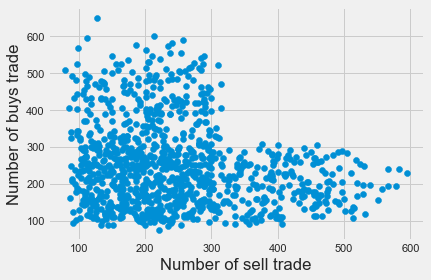

In [51]:
plt.scatter(df_1000['sell'],df_1000['buy'])
plt.xlabel("Number of sell trade")
plt.ylabel("Number of buys trade")

# Comparison graphs

In [146]:
df_pred = pd.read_csv("./results/table/model_pred_1000.csv",names=["pred"])
df_pred = df_pred.iloc[1:,:]

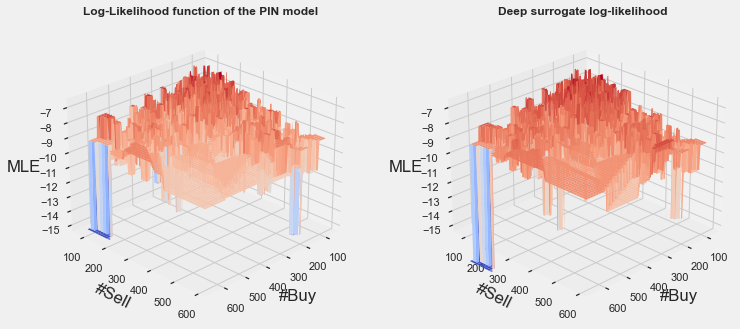

In [164]:

def make_surf_plot(X, Y, Z, ax):
        """
        Create a volatility surface plot
        """
        XX, YY = np.meshgrid(np.linspace(min(X), max(X), 230), np.linspace(min(Y), max(Y), 230))
        ZZ = griddata(np.array([X, Y]).T, np.array(Z), (XX, YY), method='nearest')

        ax.plot_surface(XX, YY, ZZ, cmap=cm.coolwarm, linewidth=0)
        ax.view_init(25, 45)
        ax.set_xlabel('#Buy')
        ax.set_ylabel('#Sell')
        ax.set_zlabel('MLE')
        plt.tight_layout()
        return fig, ax

fig = plt.figure(figsize=[6.4 * 2, 4.8])
ax = fig.add_subplot(1, 2, 1, projection='3d')

fig, ax = make_surf_plot(df_1000['buy'], df_1000['sell'], df_1000['MLE'], ax)
ax.set_title(r"Log-Likelihood function of the PIN model", fontsize=12, fontweight='bold')
bottom,top = ax.get_zlim()
ax = fig.add_subplot(1, 2, 2, projection='3d')

fig, ax = make_surf_plot(df_1000['buy'], df_1000['sell'], df_pred['pred'], ax)
ax.set_title(r"Deep surrogate log-likelihood", fontsize=12, fontweight='bold')
ax.set_zlim(bottom,top)
plt.savefig("./results/graphs/3d_comparison_model_surrogate.png")

## Create graphs for methodology part

In [59]:
import tensorflow as tf
import numpy as np

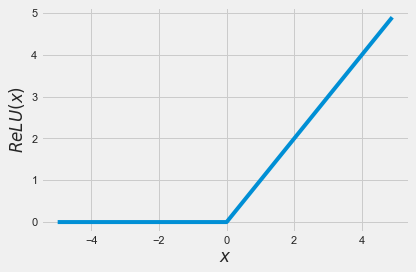

In [93]:
x = np.arange(-5,5,0.1)
y_relu = tf.nn.relu(x)
y_sigmoid = tf.nn.sigmoid(x)
y_swish = tf.nn.swish(x)
plt.xlabel(r"$x$")
plt.ylabel(r"$ReLU(x)$")
plt.plot(x,y_relu)
plt.tight_layout()
plt.savefig("./results/graphs/relu.png")

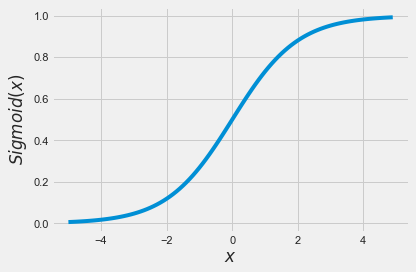

In [81]:
plt.xlabel(r"$x$")
plt.ylabel(r"$Sigmoid(x)$")
plt.plot(x,y_sigmoid)
plt.tight_layout()
plt.savefig("./results/graphs/sigmoid.png")

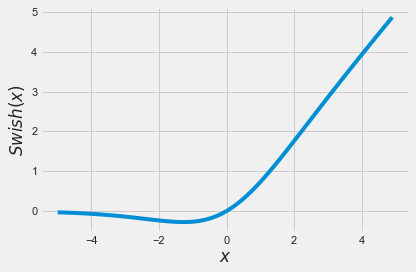

In [82]:
plt.xlabel(r"$x$")
plt.ylabel(r"$Swish(x)$")
plt.plot(x,y_swish)
plt.tight_layout()
plt.savefig("./results/graphs/swish.png")

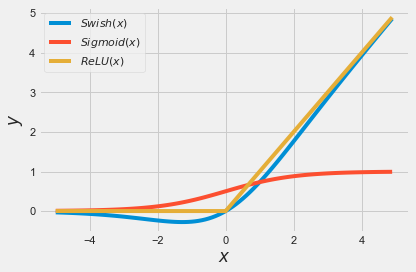

In [83]:
plt.plot(x,y_swish)
plt.plot(x,y_sigmoid)
plt.plot(x,y_relu)
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend([r'$Swish(x)$',r'$Sigmoid(x)$',r'$ReLU(x)$'])
plt.tight_layout()
plt.savefig("./results/graphs/activ_functs_comparison.png")